<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_5___EDA_Visual_Funcion_Scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Función Correlación
Ejercicio para completar los conceptos de EDA Visual definiendo una función personalizada.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace a al notebook de Colab de la clase 2](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)
*   [Enlace a este notebook de Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_4___EDA_Visual_Barsa_Madrid.ipynb)



# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

Necesitaremos pandas, numpy, matplotlib.pyplot y seaborn.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 02 Objetivo: Función correlación
El objetivo es crear una función que evalúe la correlación entre dos vectores, tanto numéricamente como visualmente. La función tomará como inputs el vector 1, el nombre del vector 1, el vector 2 y el nombre del vector 2.

La función mostrará en una misma imagen un diagrama de dispersión (scatter plot) y el coeficiente de pearson en gran formato (se puede calcular, por ejemplo, con [np.corrcoef()](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html). 

Puedes importar el dataset que quieras para probar tu función. El del fifa 19 tiene varias variables numéricas con una correlación importante. Pero no tienes por qué escoger este.

En definitiva, tu función debe devolver una imagen [como esta](https://drive.google.com/file/d/1FLoV0mn4zop5MmaSGZXVucQWdfdNwink/view?usp=sharing).

In [67]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€',  
        'Special', 'Preferred Foot', 'International Reputation',
        'Weak Foot', 'Position', 'Jersey Number', 'Joined',
        'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 
        'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 
        'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 
        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
        'GKKicking', 'GKPositioning', 'GKReflexes'
        ]

In [69]:
df_fifa19 = df_fifa19[cols]
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Height_cm,Weight_kg,Value_€,Wage_€,Release Clause_€,Special,Preferred Foot,International Reputation,Weak Foot,Position,Jersey Number,Joined,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,170.18,72.121128,110500000.0,565000.0,226500000.0,2202,Left,5.0,4.0,RF,10.0,"Jul 1, 2004",84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,187.96,83.007336,77000000.0,405000.0,127100000.0,2228,Right,5.0,4.0,ST,7.0,"Jul 10, 2018",84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,175.26,68.038800,118500000.0,290000.0,228100000.0,2143,Right,5.0,5.0,LW,10.0,"Aug 3, 2017",79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,193.04,76.203456,72000000.0,260000.0,138600000.0,1471,Right,4.0,3.0,GK,1.0,"Jul 1, 2011",17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,180.34,69.853168,102000000.0,355000.0,196400000.0,2281,Right,4.0,5.0,RCM,7.0,"Aug 30, 2015",93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


# 03 Crea la función


In [71]:
def evaluacion_correlacion(vector_x, nombre_x, vector_y, nombre_y):
  # Estilo seaborn
  sns.set()

  # Tamaño de 7.7 x 7.5
  plt.figure(figsize=(7.5, 7.5))

  # DIAGRAMA DE DISPERSIÓN
  # Simplemente utilizamos plt.scatter()
  plt.scatter(vector_x, 
              vector_y, 
              alpha = 0.1)
  
  # COEFICIENTE DE CORRELACIÓN
  # Calculamos el coeficiente pearson redondeando a dos cifras (0.XX) ... 
  # ... y lo guardamos en formato texto (str)
  corr_formato_texto = str(round(np.corrcoef(vector_x, vector_y)[0,1],2))

  # Calculamos las coordenadas donde posicionar el texto (en el medio del gráfico)
  coordenada_x = vector_x.min() + (vector_x.max()-vector_x.min())/2
  coordenada_y = vector_y.min() + (vector_y.max()-vector_y.min())/2
  
  # Utilizamos la función plt.text() 
  plt.text(s = corr_formato_texto, 
           x = coordenada_x, 
           y = coordenada_y,
           fontsize=150, 
           horizontalalignment='center',
           verticalalignment='center', 
           color = 'white', 
           alpha = 0.85)
  
  # Añadimos detalles a la imagen
  plt.ylabel(nombre_y)
  plt.xlabel(nombre_x)
  plt.title('CORRELACIÓN ' + nombre_x + ' VS ' + nombre_y,
            fontsize = 15)
  plt.show()

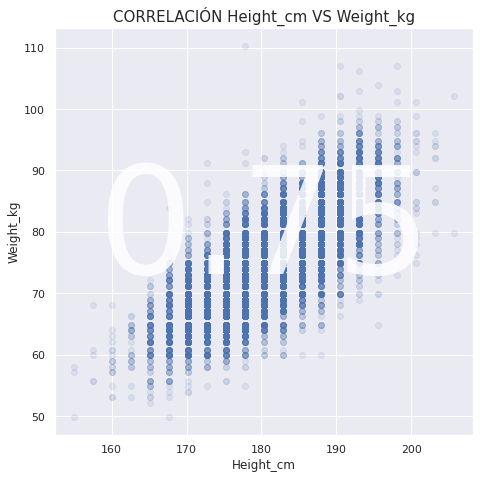

In [72]:
evaluacion_correlacion(df_fifa19['Height_cm'], 'Height_cm',
                       df_fifa19['Weight_kg'], 'Weight_kg')

# 04 Prueba tu función
Con varios pares de vectores.

In [73]:
df_fifa19.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Position', 'Jersey Number', 'Joined', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

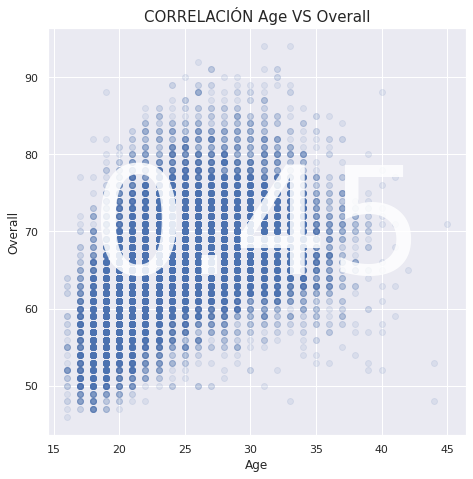

In [74]:
evaluacion_correlacion(df_fifa19['Age'], 'Age',
                       df_fifa19['Overall'], 'Overall')

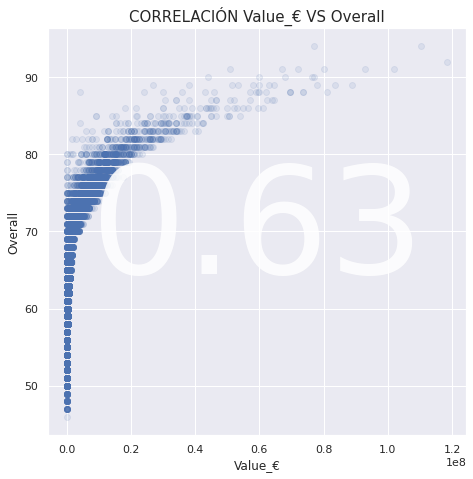

In [75]:
evaluacion_correlacion(df_fifa19['Value_€'], 'Value_€',
                       df_fifa19['Overall'], 'Overall')

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
posx and posy should be finite values
posx and posy should be finite values


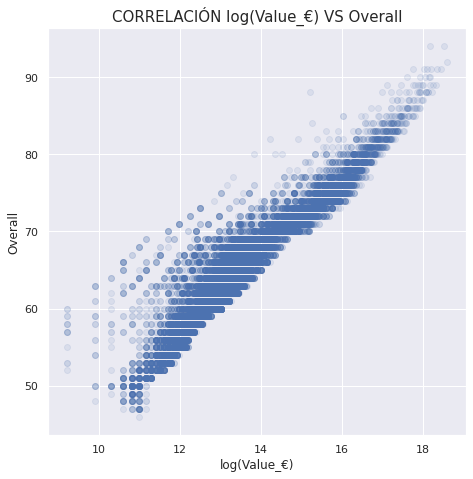

In [76]:
evaluacion_correlacion(np.log(df_fifa19['Value_€']), 'log(Value_€)',
                       df_fifa19['Overall'], 'Overall')